# Nanodegree Engenheiro de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

### Bonus ###
Um livro bastante popular Machine Learning disponibilizado gratuitamente na página do autor:

<ul>
<li><a href="https://web.stanford.edu/~hastie/ElemStatLearn/" target="_blank">The Elements of Statistical Learning</a></li>
</ul>

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **aberrante** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado.

In [1]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit
# from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print('O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.'.format(*data.shape))

/Users/alessandremartins/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alessandremartins/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [2]:
# TODO: Preço mínimo dos dados
minimum_price = np.min(prices)

# TODO: Preço máximo dos dados
maximum_price = np.max(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print('Estatísticas para os dados dos imóveis de Boston:\n')
print('Preço mínimo: ${:,.2f}'.format(minimum_price))
print('Preço máximo: ${:,.2f}'.format(maximum_price))
print('Preço médio: ${:,.2f}'.format(mean_price))
print('Preço mediano: ${:,.2f}'.format(median_price))
print('Desvio padrão dos preços: ${:,.2f}'.format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: 'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

_Utilizando sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um **aumento** no valor do `'MEDV'` ou uma **diminuição** do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções._  
**Dica:** Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?

### Bônus

O pacote seaborn possui algumas ferramentas úteis para visualização de dados (você pode instalar pelo terminal digitando: pip install seaborn). O seguinte código, fornece um sumário gráfico dos atributos:

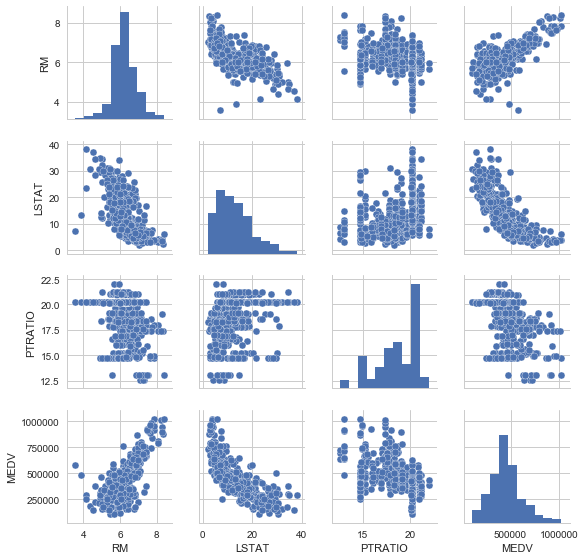

In [3]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(data, size=2)
plt.show()

Outra ferramenta útil é o mapa de calor (heatmap) para imprimir uma matriz de correlação:

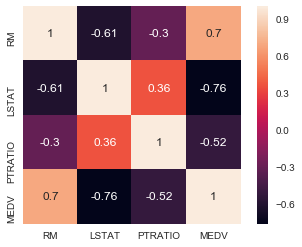

In [4]:
cols = data.columns
cm = data.corr()
sns.heatmap(cm, annot=True, square=True, yticklabels=cols, xticklabels=cols)

#### Gráfico de dispersão 1 ####

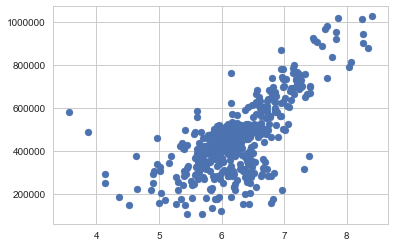

In [5]:
# gráfico da média de quartos por valor médio do imovél
plt.scatter(features['RM'], prices)

#### Gráfico de dispersão 2 ####

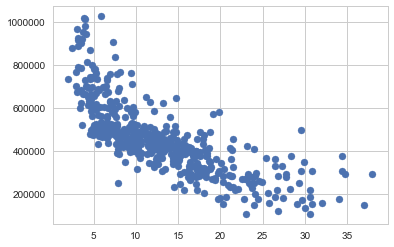

In [6]:
# gráfico de classe baixa por valor médio do imóvel
plt.scatter(features['LSTAT'], prices)

#### Gráfico de dispersão 3 ####

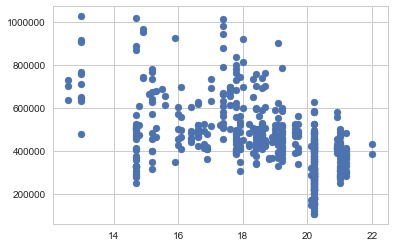

In [7]:
# gráfico da razão de estudantes para professores
plt.scatter(features['PTRATIO'], prices)

**Resposta: **
<font color='blue'>
<ul>
<li>
De modo geral, imóveis de vizinhança que tenham mais quartos custam mais do que imóveis de vizinhança que tenham menos quartos. Pude ver que tem algumas exceções, suponho que sejam de imóveis que tenham poucos quartos, porem a vizinhança possui mais imóveis com maiores quantidades de quarto ou a vizinhança é composta por proprietários de classe alta. Conforme o gráfico 1 se o RM sobe o MEDV também sobe junto.
</li>
<li>
Já o gráfico 2 nos mostra que os valores dos imóveis onde se concentram a vizinhança de proprietários da classe baixa tendem a cair muito. Sendo assim, se há mais proprietários da classe baixa a probabilidade é que o valor desses imóveis diminua consideravelmente. Caso o LSTAT aumente o MEDV baixa.
</li>
<li>
O gráfico 3 é mais disperso a relação de professores por quantidade de aluno não é muito forte é uma correlação fraca, Mas tem indícios de quanto menor a razão entre estudantes e professores mais alto é o valor do imóvel na vizinhança. Isso pode significar que quanto menos alunos por professor mais eficiente é o ensino naquela vizinhança. Mas também pode ser que as demais classes sociais sejam de população menores, possuam menos filhos que os proprietários da classe baixa. Quando o PTRATIO é baixo o MADV é alto. 
</li>
</ul>
</font>

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente da determinação para um modelo é uma estatística útil em análise regressa, como se ele frequentemente descrevesse como "good" a capacidade do modelo de fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo, ao utilizar esse modelo, ele pode ser explicado pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [8]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score # ASM: importar a lib r2_score
def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict) # ASM: atribuir a pontuação de desempenho a score
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?* 

Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo.

In [9]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print('O coeficiente de determinação, R^2, do modelo é {:.3f}.'.format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


**Resposta:**
<font color='blue'>
Todo R<sup>2</sup> próximos de 0 é considerado ruim e para ser considerado bom o R<sup>2</sup> tem que está mais proximo possível de 1.
Baseado no [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2)(dado no projeto como fonte). identificamos um R<sup>2</sup> de 0.923, sendo a variação da variável-alvo nesse modelo. Ela é alta suficiente para explicar os valores observados, se ajustando à amostra em 92,3% permitindo explicar o modelo de regressão linear.
</font>

### Bonus: Análise dos Resíduos ###

Este artigo discute os pontos fortes e fracos da métrica utilizada (R^2). Em especial, é importante observar os resíduos (erro entre a predição e os dados reais) para verificar alguma tendência que não foi identificada pela métrica. O seguinte código retorna os resíduos deste projeto:

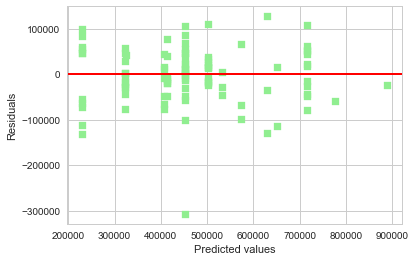

In [22]:
# antes de executar esse código tem que criar o reg na questão 9
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.axhline(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

Em um bom modelo de regressão, espera-se que os erros estejam randomicamente distribuídos em torno da linha central.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste.
  - Dividq os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [11]:
# TODO: Importar 'train_test_split'
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(21)
# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=rng)

# Êxito
print('Separação entre treino e teste feita com êxito.')

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
*Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?*  
**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta: **
<font color='blue'>
<p>É uma estratégia geral separar em dois conjuntos: o conjunto de treinamento, onde o modelo é treinado, e testamos o resultado no conjunto de teste. Lembrando da regra de ouro "Não podemos usar dados de teste para treinamento". Esses dados de teste são separados para testar exclusivamente o resultado. Com isso diminuímos os erros que consequentemente nos ajuda na escolha do melhor modelo e não para treinar o algoritmo. Podemos tratar pontos diferentes como ruído para explicar o modelo de uma forma mais simples e generalista.</p>
Acredito que o maior erro de não testar separadamente em dois conjuntos ou mais torna o modelo sem garantia. Quando falo em testar nesse ponto me refiro a validação: Como não podemos usar os dados de teste para tomada de decisão, então podemos criar mais um conjunto chamado de validação para treinar nosso modelo. Que será usado para tomar decisões sobre o modelo. Assim teremos três conjunto de dados. Treinamento, teste e validação cruzada.
Os testes ajudam a definir o melhor modelo. Nem sempre o mais complexo é a melhor solução e sim um mais geral. No teste do modelo podemos identificar os menores erros.
</font>

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.

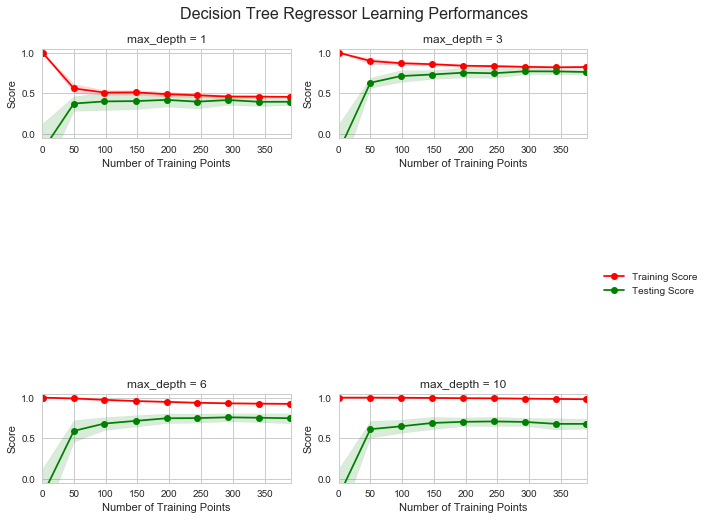

In [12]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
*Escolha um dos gráficos acima e determine a profundidade máxima para o modelo. O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste? Ter mais pontos de treinamento beneficia o modelo?*  
**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular?

**Resposta: **
<font color='blue'>
<p>
Não há vantagem em adicionar mais pontos no treinamento, pois não vão fazer tanta diferença quanto teve no inicio dos testes até quando a curva se estabiliza. Pode até almentar a precisão, porem com pouquíssima diferença, pois não consegue mais se ajustar perfeitamente ao conjunto de treinamento
</p>

<p>No gráfico de max_depth = 6, a curva de treinamento começa relativamente alta e ao aumentar os pontos de teste o modelo teve condições de aprender os padrões dos dados. Porem a medida que o adiciona mais pontos de treino a tendência de treinamento cai, chegando por volta de 0,9. 
</p>
<p>
Em contra partida a curva de teste começa do zero e sobe conforme o numero de pontos aumenta chegando próximo de 0,8 no topo dos pontos de treino.
Acredito que denota um leve inicio de uma zona de sobreajuste, não podendo ser tão bom para o modelo, pois tem uma variação razoavelmente alta e sempre apresentou ruídos no teste.
</p>

</font>

<p>Algumas referências complementares:</p>
<ul>
<li><a href="https://www.youtube.com/watch?v=9w1Yi5nMNgw" target="_blank">Katie’s lesson on Accuracy vs Training Set size</a></li>
<li><a href="https://www.coursera.org/learn/machine-learning/lecture/Kont7/learning-curves" target="_blank">Andrew Ng. Class on Learning Curve</a></li>
<li><a href="https://www.blaenkdenum.com/notes/machine-learning/#learning-curves" target="_blank">https://www.blaenkdenum.com/notes/machine-learning/#learning-curves</a></li>
</ul>

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir.

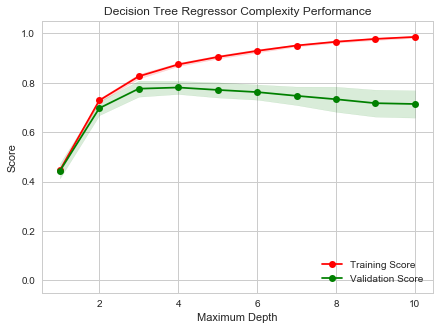

In [13]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
*Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)? E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?*  
**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta?

**Resposta: **
<font color='blue'>
Quando o modelo é treinado com o profundidade máxima 1, tem viés alto. Mostrando sub-ajuste(simplifica o problema). Isso é ruim no conjunto de validação. Pois esse modelo não explica a complexidade dos dados.
A variância diminui conforme aumenta a profundidade máxima.
Quanto mais aumentamos a profundidade máxima o erro de treinamento sobe e o de validação diminui e as curvas ficam mais distantes entre si.
Quando o modelo é treinado com o profundidade máxima 10, tem alta variância. É um super-ajuste(complica demais o problema) ou erro de alta variância. O modelo não generaliza bem.
</font>

### Questão 6 - Modelo Ótimo de Melhor Suposição
*Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido? Que intuição te levou a essa resposta?*

**Resposta: **
<font color='blue'>
Um ponto interessante é em torno do valor 3, onde as curvas começam a se distanciar, o ajuste não está nem baixo demais nem alto demais, pois está no inicio da separação das curvas generalizando bem os dados. Na minha sugestão, o melhor modelo para esses dados é a profundidade máxima 3.
</font>

<p>Caso você queira se aprofundar nestes conceitos, recomendo que você assista à esta 
<a href="https://www.coursera.org/learn/machine-learning/lecture/yCAup/diagnosing-bias-vs-variance" target="_blank">aula do Andrew Ng.</a> sobre diagnóstico de viés e variância. </p>
<p>A seguinte imagem ilustra bias e variância elevados para classificação e regressão 
(<a href="https://www.youtube.com/watch?v=dBLZg-RqoLg" target="_blank">ref</a>):<br><a href="https://i.ytimg.com/vi/dBLZg-RqoLg/maxresdefault.jpg" target="_blank"><img src="./maxresdefault.jpg" alt="maxresdefault"></a></p>

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
*O que é a técnica de busca em matriz (*grid search*) e como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?*

**Resposta: **
<font color='blue'>
<p>Na busca de grade, criamos uma tabela com todas as possibilidades possíveis. 
De modo geral acredito que, definimos para o modelo os hiperparametros e seus valores tanto quanto necessários, conforme queremos calibrar, pois esses parâmetros variam dependendo do modelo.</p>
<p>O método de busca em matriz realiza uma busca exaustiva nos valores na matriz e retorna uma matriz da combinação de diferentes hiperparametros e seus valores.</p>
<p>Para os valores de cada hiperparametro usamos valores que cresçam exponencialmente.</p>
<p>Escolhemos o modelo que obtiver o maior score dentre os testes no conjunto de treinamento de modelos lineares e polinomiais gama, e o conjunto de validação cruzada.
Para garantir que seja a melhor solução, testamos esse modelo no conjunto de teste.</p>
</font>

### Questão 8 - Validação Cruzada
*O que é a técnica de treinamento de validação-cruzada k-fold? Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?*  
**Dica:** Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada?

**Resposta: **
<font color='blue'>
<p>Na validação cruzada k-fold dividimos os dados em k partes aleatoriamente e treinamos o modelo k vezes. Em cada vez treina um conjunto diferente para teste que resulta numa medida de desempenho diferente para cada parte.
O conjunto de validação fará parte do conjunto de treinamento para ser testados. 
No resultado final obtemos a média dos erros de teste ao longo do treino nos dando uma estimativa de erro de generalização. E assim conseguimos o modelo que avalia o desempenho de cada combinação de parâmetros.
</p>
Dentre seus benefícios temos:
- É uma técnica que tem fundamento lógico e não desperdiça dados.
- A variância da estimativa de desempenho diminui quando k aumenta.
- Os dados são divididos aleatoriamente
</font>
-

<p>Referências que explica o propósito de validação cruzada no método de busca em matriz:</p>
<ul>
<li><a href="http://scikit-learn.org/stable/modules/cross_validation.html" target="_blank">http://scikit-learn.org/stable/modules/cross_validation.html</a><ul>
<li>A partir de "<em>When evaluating different settings (“hyperparameters”) for estimators,</em>"</li>
</ul>

<h3 id="coment-rio">Comentário</h3>

<p>A seguinte imagem ilustra o processo feito neste projeto:<br><a href="https://udacity-github-sync-content.s3.amazonaws.com/_attachments/38140/1485955642/K-foldCross.png" target="_blank"><img src="./K-foldCross.png" alt="K-foldCross.png"></a></p>


### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [14]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    # cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth':range(1,11)}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    # grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

/Users/alessandremartins/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
_Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo.

In [15]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

In [16]:
reg.get_params()['max_depth']

4

In [17]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print('O parâmetro max_depth é {} para o modelo ótimo.'.format(reg.get_params()['max_depth']))

O parâmetro max_depth é 4 para o modelo ótimo.


**Resposta: **
<font color='blue'>
A profundidade máxima do modelo é 4. Um a mais do que eu propus na questão 6, cheguei próximo tendo em vista que o gráfico é algo visual, difícil de localizar um ponto exato como a função que tenha sido mais precisa.
</font>

### Questão 10 -Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de quartos em um imóvel | 5 quartos | 4 quartos | 8 quartos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
*Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas? Esses preços parecem razoáveis dados os valores para cada atributo?*  
**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta.  

Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.

In [18]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print('Preço estimado para a casa do cliente {}: ${:,.2f}'.format(i+1, price))

Preço estimado para a casa do cliente 1: $407,400.00
Preço estimado para a casa do cliente 2: $230,508.51
Preço estimado para a casa do cliente 3: $888,720.00


**Resposta: **

###### Estatísticas para os dados dos imóveis de Boston: ######

|  | Valor |
| :---: | :---: |
| Preço mínimo | 105,000.00 |
| Preço máximo | 1,024,800.00 |
| Preço médio | 454,342.94 |
| Preço mediano | 438,900.00 |
| Desvio padrão dos preços | 165,171.13 |

<p></p>
<font color='blue'>
<p>Recomendaria em parte. Levando em consideração as estatísticas dos dados acima citada.<p>
<p>Recomendaria ajustar a estimativa do valor do imóvel do cliente 1 para um valor entre a média do preço estimado somada com o preço mediano(considerei que fosse um valor mais generoso que o da média), ficaria em torno de 423.150 considerando que Boston é a cidade mais importante dos EUA e que por isso é mais valorizada. A diferença entre o preço estimado e o que sugeri não chega perto do desvio padrão que considerei como a diferença máxima para uma abordagem de um valor estimado.</p>
<p>As demais estimativas recomendaria, pois são próximos das estatísticas. </p>
<p>O imóvel do cliente 2 chega a um preço muito baixo por causa dos atributos de avaliação. 
Comparado com os demais imóveis: possui poucos quartos, uma proporção de nível de pobreza grande com um índice elevado para professor/aluno.</p>
<p>Contudo, o imóvel do cliente 3 também está bem estimado pelo que podemos compor do preço máximo e os atributos que o imóvel possui.</p>
</font>

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado. Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
*Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.*  
**Dica:** Algumas questões para responder:
- *Quão relevante dados coletados em 1978 podem ser nos dias de hoje?*
- *Os atributos presentes são suficientes para descrever um imóvel?*
- *Esse modelo é robusto o suficiente para fazer estimativas consistentes?*
- *Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?*

**Resposta: **
<font color='blue'>
<p>Esse modelo dificilmente seria usado no mundo real, menos ainda nos dias atuais. São quase 40 anos para os proprietários realizarem muitas reformas nos imóveis. Sua grande maioria se não todos estão com seus atributos totalmente diferentes. Teriam que ter um tratamento para compensar esse 40 anos: Consideração a inflação ano a ano, rever cada atributo e caso queira realmente aplicar no mundo real, devemos alimentar os dados com informações mais detalhadas do imóvel e das quadras ao redor.</p> 
<p>O modelo funciona razoavelmente bem com o $ R ^ 2 $ de 86,1%, conforme mostro abaixo. 
Três atributos não são suficientes para descrever o imóvel, pois não considera tudo que pode influenciar no preço do imóvel, coisas como: quantidade de banheiros, área total, quantos pavimentos, se possui mais benfeitorias como piscina e park infantil.</p>
<p>Apesar de serem 10 conjunto diferentes e o ranger(preço máximo - preço mínimo) em torno de 69,000.00, o modelo parece fazer uma estimativa consistente.</p>
<p>Esses dados não podem ser aplicados em uma cidade rural, pois possuem muitas diferenças entre si, diferenças como: área rural total são maiores, áreas construáda são diferentes e outros</p>
</font>

In [20]:
# Gerar uma matriz para os dados do cliente
client_data = features  # Cliente 3
estimativa = []
# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    estimativa.append(price)

In [21]:
score = performance_metric(prices, estimativa)
print('O coeficiente de determinação, R^2, do modelo é {:.3f}.'.format(score))

O coeficiente de determinação, R^2, do modelo é 0.861.
